## Essential Packages

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, 
                             precision_score, recall_score)

from sklearn.model_selection import  train_test_split, GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [22]:
df = pd.read_csv('glass.csv', header = None, names = ["ID", "RI", "Na2O",
                                                      "MgO", "Al2O3", "SiO2",
                                                      "K2O", "CaO", "BaO",
                                                      "Fe2O3","Type"])
df.head(10)

,ID,RI,Na2O,MgO,Al2O3,SiO2,K2O,CaO,BaO,Fe2O3,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## Split the dataset into features and target

In [24]:
x = df.loc[:, df.columns[1:10]]
y = df["Type"]

#### The data is imbalanced since we observed classes with very high frequency while others have lower frequency.
#### We can address this issue using SMOTE (Synthetic Minority Oversampling Technique)

In [25]:
sm = SMOTE(random_state=0)
x, y = sm.fit_resample(x, y)

## Split the Data into Train and Test 

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

## Pre Process the Data

In [27]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Building Different Models

### 1) Logistic Regression

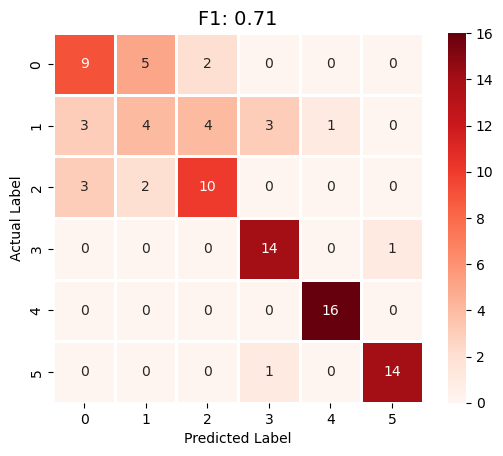

Train Score: 0.843
Test Score:  0.728


In [31]:
LR = LogisticRegression(random_state=0).fit(x_train_scaled, y_train)

y_pred_LR = LR.predict(x_test_scaled)

f1_score_LR = f1_score(y_test, y_pred_LR, average="macro")
precision_score_LR = precision_score(y_test, y_pred_LR, average="macro")
accuracy_score_LR = accuracy_score(y_test, y_pred_LR)
recall_score_LR = recall_score(y_test, y_pred_LR, average="macro")

cm_LR = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm_LR, annot=True, fmt=".0f", linewidths=1, square=True, cmap="Reds")

plt.ylabel("Actual Label", color="black")
plt.xlabel("Predicted Label", color="black")
plt.title(f"F1: {f1_score_LR:.2f}", size=14, color="black")
plt.show()

print("Train Score: {0:.3f}\nTest Score: {1: .3}".format(LR.score(x_train_scaled, y_train), LR.score(x_test_scaled, y_test)))

### 2) Support Vector Classifier

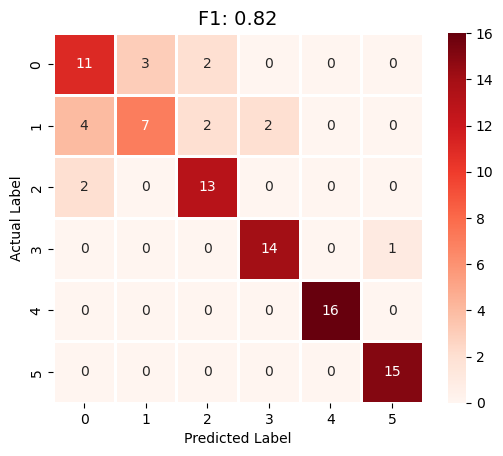

Train Score: 0.890
Test Score:  0.826


In [8]:
svc = SVC().fit(x_train_scaled, y_train)

y_pred_svc = svc.predict(x_test_scaled)

f1_score_svc = f1_score(y_test, y_pred_svc, average="macro")
precision_score_svc = precision_score(y_test, y_pred_svc, average="macro")
accuracy_score_svc = accuracy_score(y_test, y_pred_svc)
recall_score_svc = recall_score(y_test, y_pred_svc, average="macro")

cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt=".0f", linewidths=1, square=True, cmap="Reds")

plt.ylabel("Actual Label", color="black")
plt.xlabel("Predicted Label", color="black")
plt.title(f"F1: {f1_score_svc:.2f}", size=14, color="black")
plt.show()

print("Train Score: {0:.3f}\nTest Score: {1: .3}".format(svc.score(x_train_scaled, y_train), svc.score(x_test_scaled, y_test)))

### 3) K-Nearest Neighbors

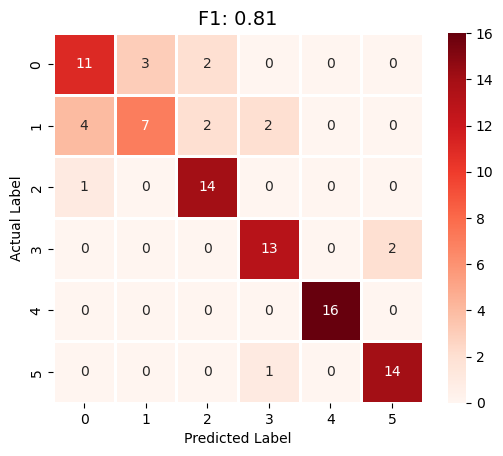

Train Score: 0.893
Test Score:  0.815


In [9]:
knn = KNeighborsClassifier().fit(x_train_scaled, y_train)

y_pred_knn = knn.predict(x_test_scaled)

f1_score_knn = f1_score(y_test,y_pred_knn, average="macro")
precision_score_knn = precision_score(y_test, y_pred_knn, average="macro")
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)
recall_score_knn = recall_score(y_test, y_pred_knn, average="macro")

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=1, square=True, cmap="Reds")

plt.ylabel("Actual Label", color="black")
plt.xlabel("Predicted Label", color="black")
plt.title(f"F1: {f1_score_knn:.2f}", size=14, color="black")
plt.show()

print("Train Score: {0:.3f}\nTest Score: {1: .3}".format(knn.score(x_train_scaled, y_train), knn.score(x_test_scaled, y_test)))

### 4) Decision Tree

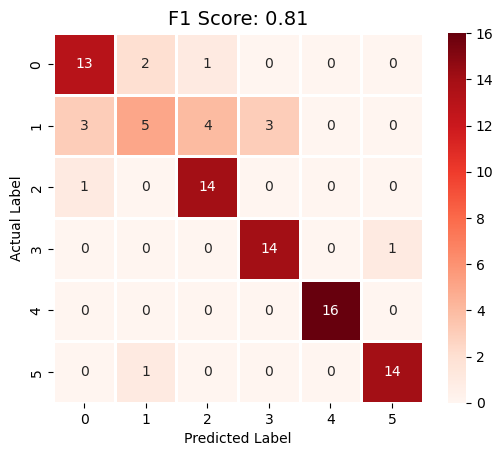

Train Score: 1.000
Test Score:  0.826


In [10]:
DT = tree.DecisionTreeClassifier().fit(x_train_scaled, y_train)

y_pred_DT = DT.predict(x_test_scaled)

f1_score_DT = f1_score(y_test, y_pred_DT, average="macro")
precision_score_DT = precision_score(y_test, y_pred_DT, average="macro")
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
recall_score_DT = recall_score(y_test, y_pred_DT, average="macro")

cm_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cm_DT, annot=True, fmt=".0f", linewidths=1, square=True, cmap="Reds")

plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title(f"F1 Score: {f1_score_DT:.2f}", size=14, color="black")
plt.show()

print("Train Score: {0:.3f}\nTest Score: {1: .3}".format(DT.score(x_train_scaled, y_train), DT.score(x_test_scaled, y_test)))

### 5) Random Forest

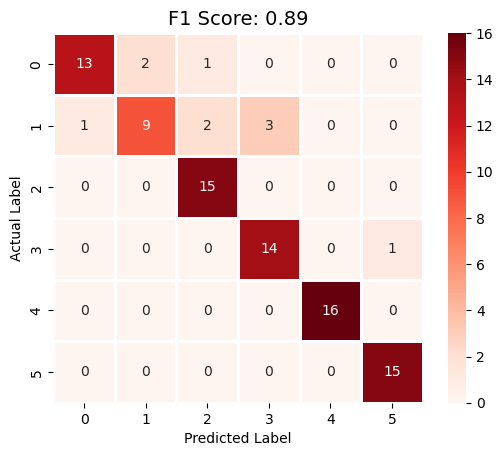

Train Score: 1.000
Test Score:  0.891


In [11]:
RF = RandomForestClassifier().fit(x_train_scaled, y_train)

y_pred_RF = RF.predict(x_test_scaled)

f1_score_RF = f1_score(y_test, y_pred_RF, average="macro")
precision_score_RF = precision_score(y_test, y_pred_RF, average="macro")
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
recall_score_RF = recall_score(y_test, y_pred_RF, average="macro")

cm_RF = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm_RF, annot=True, fmt=".0f", linewidths=1, square=True, cmap="Reds")

plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title(f"F1 Score: {f1_score_RF:.2f}", size=14, color="black")
plt.show()

print("Train Score: {0:.3f}\nTest Score: {1: .3}".format(RF.score(x_train_scaled, y_train), RF.score(x_test_scaled, y_test)))

## Performance Measurements

In [33]:
print("-"*55)
print("Logistic Regression Report\n")
print(classification_report(y_test, y_pred_LR))
print("-"*55)

print("Support Vector Classifier Report\n")
print(classification_report(y_test, y_pred_svc))
print("-"*55)

print("K-Nearest Neighbors Report\n")
print(classification_report(y_test, y_pred_knn))
print("-"*55)

print("Decision Tree Report\n")
print(classification_report(y_test, y_pred_DT))
print("-"*55)

print("Random Forest Report\n")
print(classification_report(y_test, y_pred_RF))
print("-"*55)

-------------------------------------------------------
Logistic Regression Report

              precision    recall  f1-score   support

           1       0.60      0.56      0.58        16
           2       0.36      0.27      0.31        15
           3       0.62      0.67      0.65        15
           5       0.78      0.93      0.85        15
           6       0.94      1.00      0.97        16
           7       0.93      0.93      0.93        15

    accuracy                           0.73        92
   macro avg       0.71      0.73      0.71        92
weighted avg       0.71      0.73      0.72        92

-------------------------------------------------------
Support Vector Classifier Report

              precision    recall  f1-score   support

           1       0.65      0.69      0.67        16
           2       0.70      0.47      0.56        15
           3       0.76      0.87      0.81        15
           5       0.88      0.93      0.90        15
           6

## Highlight the Best Models for each Performance Measurement

In [34]:
models = pd.DataFrame(["Logistic Regression",
                      "Support Vector Classifier",
                      "K-Nearest Neighbors",
                      "Decision Tree",
                      "Random Forest Classifier"])

f1 = pd.DataFrame([f1_score_LR, f1_score_svc, f1_score_knn, f1_score_DT, f1_score_RF])

precision = pd.DataFrame([precision_score_LR, precision_score_svc,
                          precision_score_knn, precision_score_DT,
                          precision_score_RF])

accuracy = pd.DataFrame([accuracy_score_LR, accuracy_score_svc,
                         accuracy_score_knn, accuracy_score_DT,
                         accuracy_score_RF])

recall = pd.DataFrame([recall_score_LR, recall_score_svc,
                       recall_score_knn, recall_score_DT,
                       recall_score_RF])

df = pd.concat([models, f1, precision, accuracy, recall], axis=1)
df.columns = ["Algorithm", "F1", "Precision", "Accuracy", "Recall"]

df.style.highlight_max(subset=["F1", "Precision", "Accuracy", "Recall"], color="#01AEB5")

,Algorithm,F1,Precision,Accuracy,Recall
0,Logistic Regression,0.714169,0.706821,0.728261,0.727083
1,Support Vector Classifier,0.818356,0.820711,0.826087,0.825694
2,K-Nearest Neighbors,0.806320,0.808796,0.815217,0.814583
3,Decision Tree,0.809087,0.813902,0.826087,0.824306
4,Random Forest Classifier,0.885135,0.890186,0.891304,0.890972


## Hyperparameters Tunning

In [36]:
#LR.get_params()
grid_LR = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], "C": range(1, 20),
           "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
           'max_iter' : [100, 1000,2500, 5000]}

#logistic = LogisticRegression(random_state=0)
logistic_cv = GridSearchCV(LogisticRegression(random_state=0), grid_LR, verbose = True, cv=3)
logistic_cv.fit(x_train_scaled, y_train)
y_pred_LR = logistic_cv.predict(x_test_scaled)

print("Best hiperparameters: {}".format(knn_cv.best_params_))

f1_score_LR_h = f1_score(y_test, y_pred_LR, average="macro")
precision_score_LR_h = precision_score(y_test, y_pred_LR, average="macro")
accuracy_score_LR_h = accuracy_score(y_test, y_pred_LR)
recall_score_LR_h = recall_score(y_test, y_pred_LR, average="macro")

Fitting 3 folds for each of 1520 candidates, totalling 4560 fits
Best hiperparameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [37]:
#svc.get_params()
grid_svc = {"C": [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            "kernel": ["linear", "poly", "rbf", "sigmoid"]}

svc_cv = GridSearchCV(SVC(random_state=0), grid_svc, verbose=True, cv=3)
svc_cv.fit(x_train_scaled, y_train)
y_pred_svc = svc_cv.predict(x_test_scaled)

print("Best hiperparameters: {}".format(svc_cv.best_params_))
            
f1_score_svc_h = f1_score(y_test, y_pred_svc, average="macro")
precision_score_svc_h = precision_score(y_test, y_pred_svc, average="macro")
accuracy_score_svc_h = accuracy_score(y_test, y_pred_svc)
recall_score_svc_h = recall_score(y_test, y_pred_svc, average="macro")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best hiperparameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [35]:
#knn.get_params()
grid_knn = {"n_neighbors": np.arange(1, 50),
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']}

knn_cv = GridSearchCV(KNeighborsClassifier(), grid_knn, verbose=1, cv=3, n_jobs=-1)
knn_cv.fit(x_train_scaled, y_train)
y_pred_knn = knn_cv.predict(x_test_scaled)

print("Best hiperparameters: {}".format(knn_cv.best_params_))

f1_score_knn_h = f1_score(y_test, y_pred_knn, average="macro")
precision_score_knn_h = precision_score(y_test, y_pred_knn, average="macro")
accuracy_score_knn_h = accuracy_score(y_test, y_pred_knn)
recall_score_knn_h = recall_score(y_test, y_pred_knn, average="macro")

Fitting 3 folds for each of 294 candidates, totalling 882 fits
Best hiperparameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [52]:
#DT.get_params()
grid_DT = {'max_depth': [2, 3, 5, 10, 20],
           'min_samples_leaf': [5, 10, 20, 50, 100],
           'criterion': ["gini", "entropy"]}

dt = tree.DecisionTreeClassifier(random_state=0)
DT_cv = GridSearchCV(estimator=dt, param_grid=grid_DT, verbose=1, cv=3, scoring="accuracy")
DT_cv.fit(x_train_scaled, y_train)
y_pred_DT = DT_cv.predict(x_test_scaled)

print("Best hiperparameters: {}".format(DT_cv.best_params_))

f1_score_DT_h = f1_score(y_test, y_pred_DT, average="macro")
precision_score_DT_h = precision_score(y_test, y_pred_DT, average="macro")
accuracy_score_DT_h = accuracy_score(y_test, y_pred_DT)
recall_score_DT_h = recall_score(y_test, y_pred_DT, average="macro")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hiperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}


In [61]:
#RF.get_params()
grid_RF = {"n_estimators": np.arange(1, 120), 'max_features': [1, 20],
           "max_depth": [1, 50, None], 'bootstrap': [True, False]}

RF_cv = GridSearchCV(RandomForestClassifier(random_state=0), grid_RF, cv=3, scoring='neg_mean_squared_error')
RF_cv.fit(x_train_scaled, y_train)
y_pred_RF = RF_cv.predict(x_test_scaled)

print("Best hiperparameters: {}".format(RF_cv.best_params_))

f1_score_RF_h = f1_score(y_test, y_pred_RF, average="macro")
precision_score_RF_h = precision_score(y_test, y_pred_RF, average="macro")
accuracy_score_RF_h = accuracy_score(y_test, y_pred_RF)
recall_score_RF_h = recall_score(y_test, y_pred_RF, average="macro")

Best hiperparameters: {'bootstrap': True, 'max_depth': 50, 'max_features': 1, 'n_estimators': 23}


In [62]:
models = pd.DataFrame(["Logistic Regression", "Support Vector Classifier",
                       "K-Nearest Neighbors", "Decision Tree",
                       "Random Forest Classifier"])

f1 = pd.DataFrame([f1_score_logistic_h, f1_score_svc_h,
                   f1_score_knn_h, f1_score_DT_h, f1_score_RF_h])

precision = pd.DataFrame([precision_score_logistic_h, precision_score_svc_h, 
                          precision_score_knn_h, precision_score_DT_h,
                          precision_score_RF_h])

accuracy = pd.DataFrame([accuracy_score_logistic_h,accuracy_score_svc,
                         accuracy_score_knn, accuracy_score_DT_h,
                         accuracy_score_RF_h])

recall = pd.DataFrame([recall_score_logistic_h, recall_score_svc,
                       recall_score_knn, recall_score_DT_h,
                       recall_score_RF_h,])

df2 = pd.concat([models, f1, precision, accuracy, recall], axis=1)
df2.columns = ["Algorithm", "F1", "Precision", "Accuracy", "Recall"]

df2.style.highlight_max(subset=["F1", "Precision", "Accuracy", "Recall"], color="#01AEB5")

,Algorithm,F1,Precision,Accuracy,Recall
0,Logistic Regression,0.712261,0.704657,0.728261,0.727083
1,Support Vector Classifier,0.831625,0.837483,0.826087,0.825694
2,K-Nearest Neighbors,0.910432,0.923246,0.815217,0.814583
3,Decision Tree,0.799638,0.800295,0.804348,0.802778
4,Random Forest Classifier,0.869783,0.873611,0.880435,0.879167
